# Continuous Ranked Probability Score (CRPS)

Uncertainty is something weather models have not done away with entirely. Rather than focusing only on accurate models, scientists have begun to use the models they have got to explore how slightly different initial conditions affect the future predictions, resulting in a richer understanding of the possibilities the future holds. This approach is called ensemble modelling. For example, the ACCESS GE model runs 18 ensemble members. This provides 18 distinct forecasts for each time in the future, and interpreting these as points on a probability distribution allows people to consider more and less likely future outcomes.

The CRPS function is utilised to compare a predicted range of possibilities to what actually happens. It can also compare a hypothesised set of probabilities to an observed set of frequencies.

The first situation would be used to compare and ensemble forecast to the actual outcomes.
The second situation would be used to validate the understanding of a process. For example, rolling a dice many times can allow someone to validate whether it is evenly balanced - i.e. whether the expected likelihood of rolling a '6' truly occurs 1/6th of the time in the long term.

The CRPS is the Mean Absolute Error of the forecast distribution with respect to the observed distribution. The API documentation contains an explanation, and further reading can be found at         

  - Matheson, J. E., and R. L. Winkler, 1976: Scoring rules for continuous probability distributions.
            Manage. Sci.,22, 1087–1095.
  - Gneiting, T., & Ranjan, R. (2011). Comparing Density Forecasts Using Threshold- and
            Quantile-Weighted Scoring Rules.
            Journal of Business & Economic Statistics, 29(3), 411–422. http://www.jstor.org/stable/23243806

Ensemble forecasts take considerably more disk space for the same spatial resolution. For this reason, it is also common to fit the ensemble members to a known distribution such as the normal curve, and express the forecast as an expectation value and a standard deviation.

For the purpose of this tutorial, the deterministic value will be used to generate a synthetic ensemble. The deterministic forecast will provide the expectation value, and a normal curve with a standard deviation based on the mean absolute error will be used. This is not particularly scientific but will generate a usable data structure to explore the use of the CRPS function.

In [1]:
from scores.probability import crps_cdf
import matplotlib.pyplot as plt

import numpy
import pandas
import scipy
import xarray

In [2]:
fcst = numpy.linspace(1, 10, 100)  # Let's consider a range of forecast values between 1 and 10 degrees

Text(0, 0.5, 'Probability of Occurence')

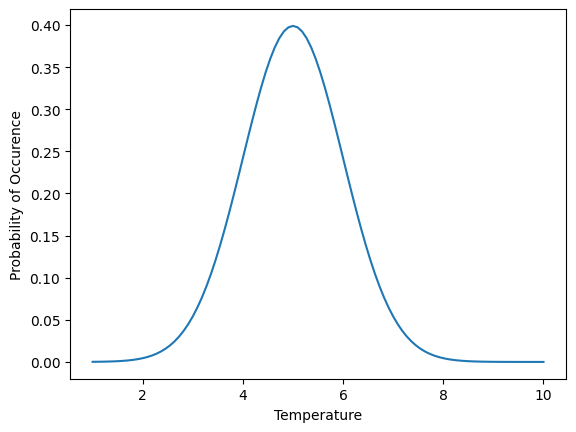

In [3]:
# Let's imagine the temperature will probably be 5 degrees celcius at some location, with some possibility it is higher or lower
curve = scipy.stats.norm.pdf(fcst, loc=5)
plt.plot(fcst, curve)
plt.xlabel("Temperature")
plt.ylabel("Probability of Occurence")

Text(0, 0.5, 'Probability of Exceedence')

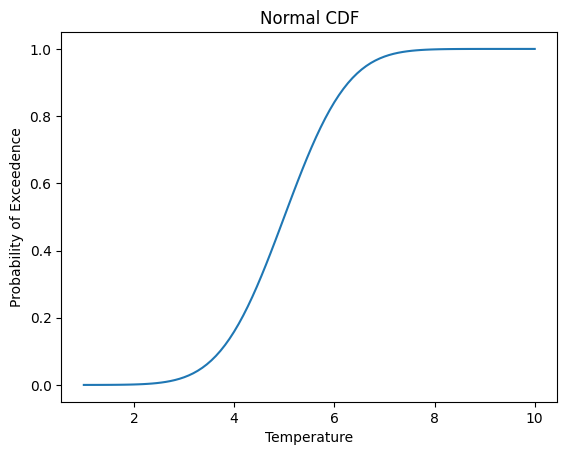

In [4]:
# We need to transform this into a cumulative probability distribution. At each point on this curve, what is the probability that
# the temperature is X or lower? Here's what the same thing looks like as a CDF. It is certain (probability 1) that the
# the temperature is 10 or less. It is pretty likely the temperature will be 6 or less, and 50% likely to be 5 or less.
fcst_cdf = scipy.stats.norm.cdf(fcst, loc=5)
plt.plot(fcst, fcst_cdf)
plt.title("Normal CDF")
plt.xlabel("Temperature")
plt.ylabel("Probability of Exceedence")

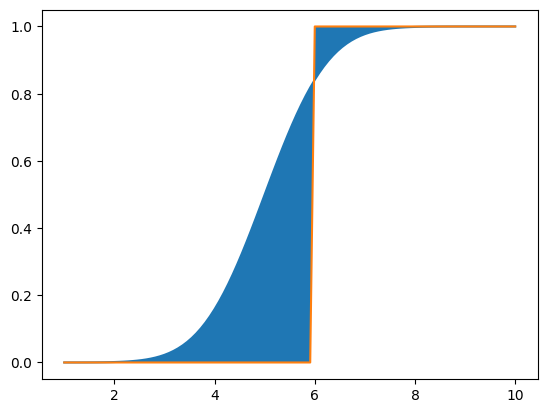

In [5]:
# Let's say we now observe a temperature of 6 degrees. How good was this probability curve?
# The idealised curve would have said it was impossible for the lower values to have occurred, and that
# above 6, it is certain that the temperature would be lower. The perfect forecast would have been a step
# function at temperature=6. The average gap between the prediction cumulative estimate and the idealised
# estimate constitutes the CRPS for a probablistic forecast with a deterministic observation.
observed = 6
observed_cdf = numpy.heaviside(fcst-observed, 1)
plt.plot(fcst, fcst_cdf)
plt.plot(fcst, observed_cdf)
plt.fill_between(fcst, fcst_cdf, observed_cdf)

In [6]:
fcst_array = xarray.DataArray(coords={'temp': fcst}, data=fcst_cdf)
obs_array = xarray.DataArray(6)

In [7]:
# Here we calculate the CRPS for the forecast given an actual observation of 6
crps_cdf(fcst_array, obs_array, threshold_dim='temp').total.values

/work/tjl/projects/scores/src/scores/probability/functions.py:116: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  thresholds = np.sort(pd.unique(thresholds))


array(0.60238622)